In [1]:
from sashimi_c import *
import matplotlib.pyplot as plt

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size']  = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size']  = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size']  = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction']   = 'in'
plt.rcParams['ytick.direction']   = 'in'
plt.rcParams['xtick.major.pad']   = 8
plt.rcParams['xtick.top']         = True
plt.rcParams['ytick.right']       = True

# Calculate subhalo properties

First, read the 'subhalo-observables' class first with a parameter of the host halo mass at $z = 0$. Then you obtain various quantities such as the subhalo masses and density profile parameters $r_s$ and $\rho_s$. Read the documentation of the subhalo_observables class for full details. Note that throughout $\texttt{SASHIMI}$, halos and subhalos are assumed to follow the NFW profile.

In [2]:
obs = subhalo_observables(M0_per_Msun=1.e12)

Using these parameters, one can investigate various properties of subhalos in this host halo.

However, $\texttt{SASHIMI}$ also comes with pre-cooked convenient functions that excute some of the most demanding tasks.

# Subhalo mass function

First is to make the subhalo mass function $dN_{\rm sh}/dm$. Compare this with Fig. 2 (top) of Hiroshima et al. arXiv:1803.07691.

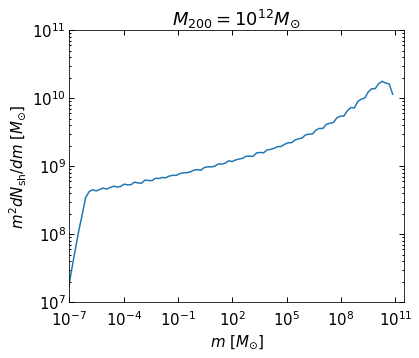

In [3]:
m,dNdlnm = obs.mass_function()
plt.figure(figsize=(6,5))
plt.loglog(m,m*dNdlnm)
plt.xlim(1.e-7,3.e11)
plt.ylim(1.e7,1.e11)
plt.xlabel(r'$m$ [$M_{\odot}$]')
plt.ylabel(r'$m^{2}dN_{\rm sh}/dm$ [$M_{\odot}$]')
plt.title(r'$M_{200}=10^{12}M_{\odot}$')
plt.show()

Next, we demonstrate how to plot cumulative number of satellite galaxies, assuming that they form in a host subhalo with its peak mass greater than some threshold value. In this example, we adopt $M_{\rm peak}^{\rm th} = 10^{8} M_{\odot}$. Top panel is plotted as a function of subhalo mass $m$ and the bottom as a function of maximum circular velocity $V_{\rm max}$.

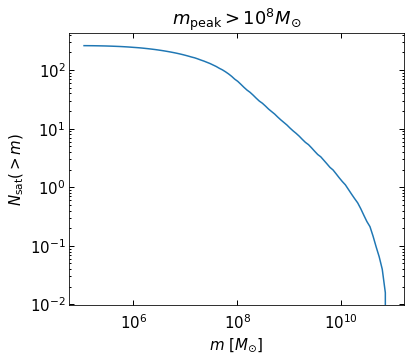

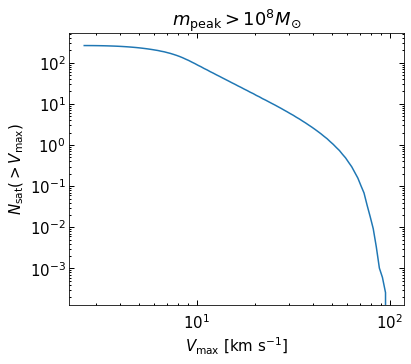

In [4]:
m,Nccum_m,Vmax,Nccum_Vmax = obs.Nsat_Mpeak(1.e8*obs.Msun)
plt.figure(figsize=(6,5))
plt.loglog(m,Nccum_m)
plt.xlabel(r'$m$ [$M_{\odot}$]')
plt.ylabel(r'$N_{\rm sat}(>m)$')
plt.title(r'$m_{\rm peak}>10^{8}M_{\odot}$')
plt.show()

plt.figure(figsize=(6,5))
plt.loglog(Vmax,Nccum_Vmax)
plt.xlabel(r'$V_{\rm max}$ [km s$^{-1}$]')
plt.ylabel(r'$N_{\rm sat}(>V_{\rm max})$')
plt.title(r'$m_{\rm peak}>10^{8}M_{\odot}$')
plt.show()

Now the same plots but by assuming that the satellites form in a host subhalo with peak value of $V_{\rm max}$, $V_{\rm peak}$, that is larger than some threshold value. In this example, we show the case of $V_{\rm peak}^{\rm th} = 18 ~ \mathrm{km/s}$.

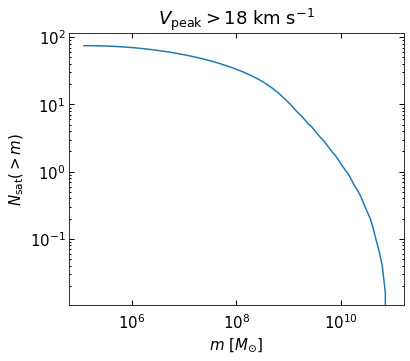

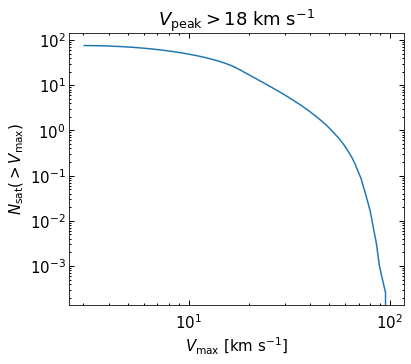

In [5]:
m,Nccum_m,Vmax,Nccum_Vmax = obs.Nsat_Vpeak(18.*obs.km/obs.s)
plt.figure(figsize=(6,5))
plt.loglog(m,Nccum_m)
plt.xlabel(r'$m$ [$M_{\odot}$]')
plt.ylabel(r'$N_{\rm sat}(>m)$')
plt.title(r'$V_{\rm peak}>18$ km s$^{-1}$')
plt.show()

plt.figure(figsize=(6,5))
plt.loglog(Vmax,Nccum_Vmax)
plt.xlabel(r'$V_{\rm max}$ [km s$^{-1}$]')
plt.ylabel(r'$N_{\rm sat}(>V_{\rm max})$')
plt.title(r'$V_{\rm peak}>18$ km s$^{-1}$')
plt.show()

# Annihilation boost factor

One can calculate the annihilation boost factor 
$B_{\rm sh} = L_{\rm sh}/L_{\rm host,0}$.
We also show the ratio of total luminosity due to annihilation (host+subhalos) and the host luminosity. Ando et al. arXiv:1903.11427 discuss that this is obtained as
$L_{\rm sh}/L_{\rm host,0} = 1-f_{\rm sh}^2+B_{\rm sh}$
where $f_{\rm sh}$ is the subhalo mass fraction.

In [6]:
obs.annihilation_boost_factor()

(1.8587662586039513, 2.843143785940681)

# Making a subhalo catalog

Finally, it might be sometimes interesting to generate a sample of subhalos using the Monte Carlo simulations. This can be done with a given threshold mass as follows.

In [7]:
ma200,z_a,rs_a,rhos_a,m0,rs0,rhos0,ct0 = obs.subhalo_catalog_MC(mth=1.e8*obs.Msun)

Here each of these parameters such as ma200 is a list of values. Each entry correspond to one subhalo.

For example, one can plot cumulative mass function as follows.

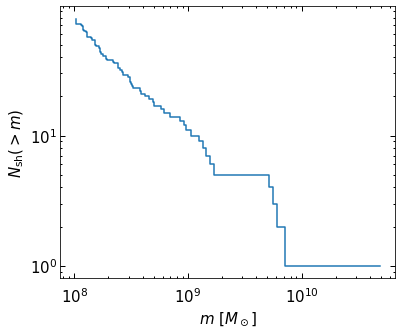

In [8]:
plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')
plt.step(np.sort(m0),np.arange(1,np.alen(m0)+1)[::-1])
plt.xlabel(r'$m$ [$M_\odot$]')
plt.ylabel(r'$N_{\rm sh}(>m)$')
plt.show()

And scatter plots of density profile parameters $r_s$ and $\rho_s$.

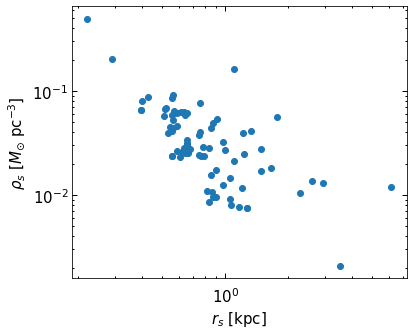

In [9]:
plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')
plt.scatter(rs0,rhos0)
plt.xlabel(r'$r_s$ [kpc]')
plt.ylabel(r'$\rho_s$ [$M_{\odot} \ \mathrm{pc^{-3}}$]')
plt.show()